In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv("Iris.csv")
data = data.sample(frac=1)
def encode(x):
    return ["Iris-setosa", "Iris-versicolor", "Iris-virginica"].index(x)
data["Species"] = data["Species"].apply(encode)
Dataset1 = data[["SepalLengthCm","SepalWidthCm"]]
Dataset2 = data[["PetalLengthCm","PetalWidthCm"]]

In [2]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
114,115,5.8,2.8,5.1,2.4,2
119,120,6.0,2.2,5.0,1.5,2
69,70,5.6,2.5,3.9,1.1,1
110,111,6.5,3.2,5.1,2.0,2
5,6,5.4,3.9,1.7,0.4,0


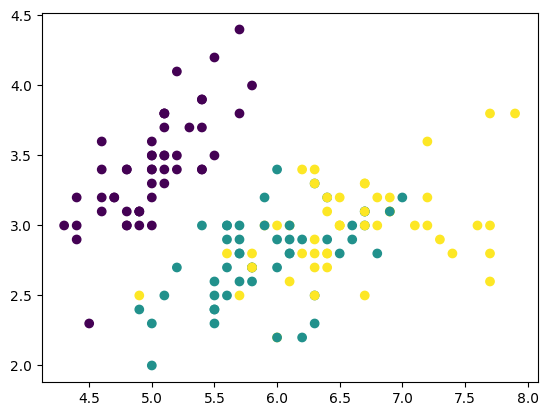

In [3]:
import matplotlib.pyplot as plt
ax = plt.scatter(Dataset1["SepalLengthCm"], Dataset1["SepalWidthCm"], c=data["Species"])
plt.show()

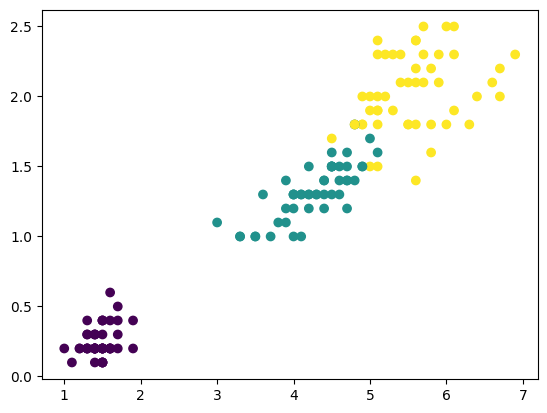

In [4]:
ax = plt.scatter(Dataset2["PetalLengthCm"], Dataset2["PetalWidthCm"], c=data["Species"])
plt.show()

In [97]:
class FuzzyCMeans:
    def __init__(self, data, c = 2, m = 2):
        data = data.copy()
        assert c > 1, "Number of Clusters should be more than 1"
        dim = len(data.columns)
        for i in range(c-1):
            data[f"gamma{i+1}"] = np.random.random(len(data))/c
        data[f"gamma{c}"] = 1 - sum([data[f"gamma{i+1}"] for i in range(c-1)])
        not_converged = True
        while not_converged:
            not_converged = False
            centres = []
            for i in range(1,c+1):
                mu2 = data[f"gamma{i}"]**2
                centre = []
                for col in data.columns[:dim]:
                    centre.append((mu2*data[col]).sum()/mu2.sum())
                centres.append(centre)
            centres = np.array(centres)
            for i, centre in enumerate(centres):
                dis = 0
                for j, col in enumerate(data.columns[:dim]):
                    dis += (centre[j] - data[col])**2
                data[f"dist{i+1}"] = dis
            for i in range(1,c+1):
                new_gamma = np.zeros(len(data))
                for j in range(1,c+1):
                    new_gamma += (data[f"dist{i}"] / data[f"dist{j}"])**(1/(m-1))
                new_gamma = 1/new_gamma
                if ((new_gamma-data[f"gamma{i}"]).abs() > 0.001).any():
                    not_converged = True
                data[f"gamma{i}"] = new_gamma
            self.centres = centres
        # data["label"] = np.argmax(np.array([data[f"gamma{i}"] for i in range(1, c+1)]), axis=0)
        data["label"] = np.argmin(np.array([data[f"dist{i}"] for i in range(1, c+1)]), axis=0)
        
        self.data = data


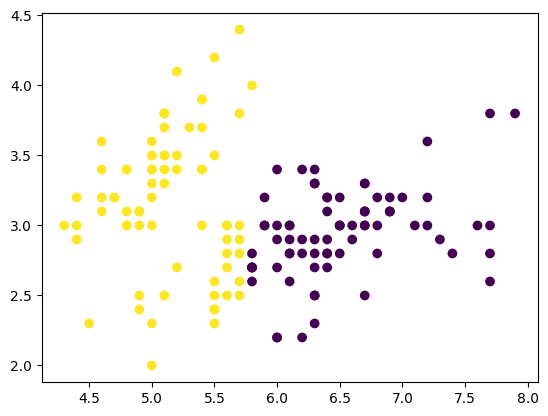

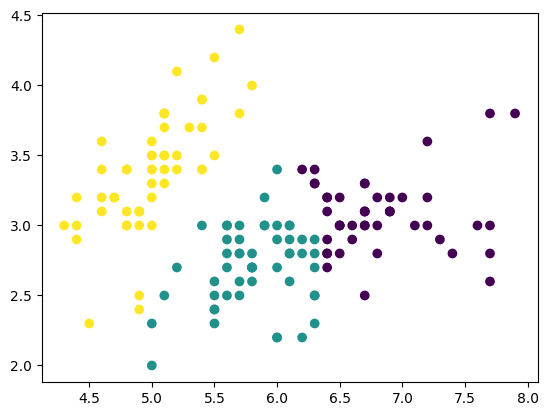

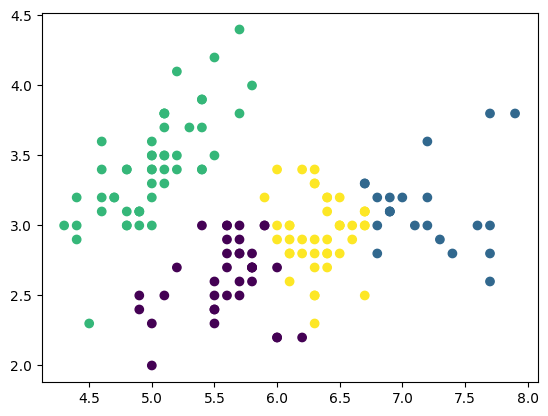

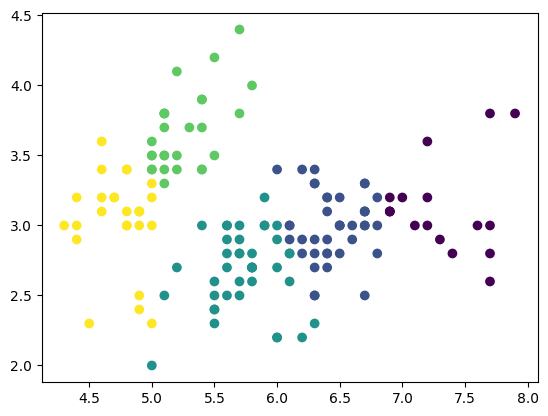

In [103]:
for i in range(2, 6):
    fcm1 = FuzzyCMeans(Dataset1, i)
    ax = plt.scatter(Dataset1["SepalLengthCm"], Dataset1["SepalWidthCm"], c=fcm1.data["label"])
    plt.show()

In [99]:
data = fcm1.data.copy()
np.argmin(np.array([data[f"dist{i}"] for i in range(1, 4)]), axis=0)

array([0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 0, 2, 0, 1, 1, 0,
       0, 0, 0, 0, 2, 0, 2, 0, 0, 1, 1, 2, 0, 1, 1, 0, 0, 1, 2, 0, 0, 2,
       0, 0, 2, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 2, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 1, 2, 0, 0, 0, 1, 1, 2, 0, 0, 1, 0,
       2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 2, 2, 2], dtype=int64)

In [100]:
fcm1.data.head()

,SepalLengthCm,SepalWidthCm,gamma1,gamma2,gamma3,gamma4,gamma5,dist1,dist2,dist3,dist4,dist5,label
114,5.8,2.8,0.029689,0.012211,0.013521,0.938457,0.006122,0.463838,1.127714,1.018441,0.014674,2.249532,3
119,6.0,2.2,0.217555,0.079049,0.068232,0.559440,0.075724,0.828802,2.281000,2.642617,0.322305,2.381136,3
69,5.6,2.5,0.050392,0.047827,0.034528,0.851658,0.015596,0.968919,1.020891,1.414093,0.057330,3.130733,3
110,6.5,3.2,0.853099,0.013355,0.021928,0.047338,0.064281,0.046643,2.979594,1.814646,0.840584,0.619021,0
5,5.4,3.9,0.043575,0.080693,0.801029,0.054606,0.020097,1.941694,1.048527,0.105626,1.549444,4.209970,2


In [101]:
fcm1.data["label"].value_counts()

3    40
0    40
2    27
1    26
4    17
Name: label, dtype: int64

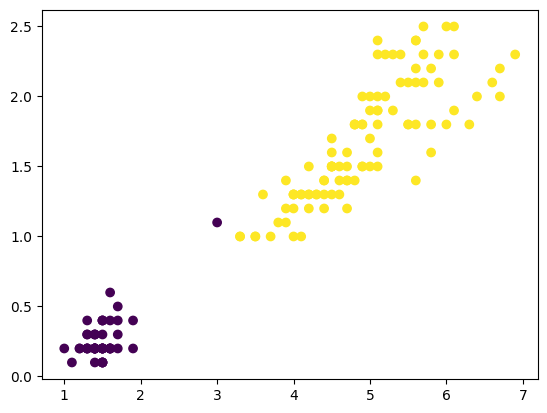

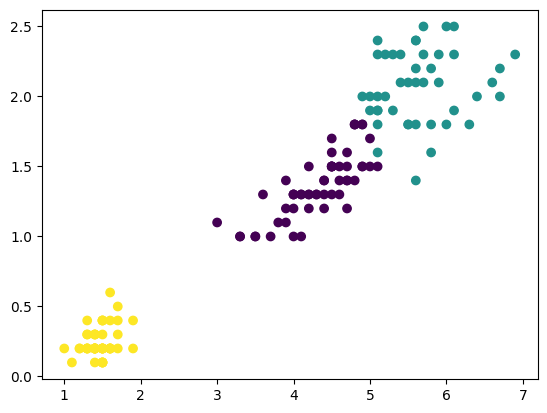

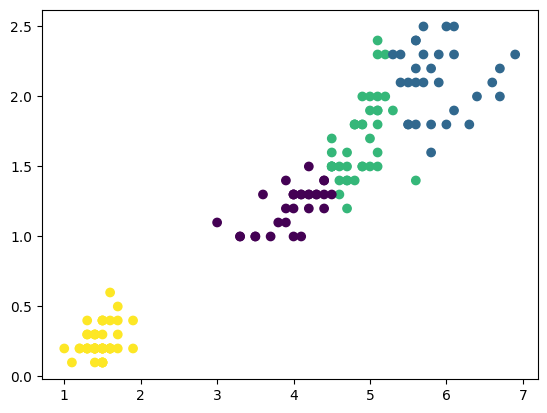

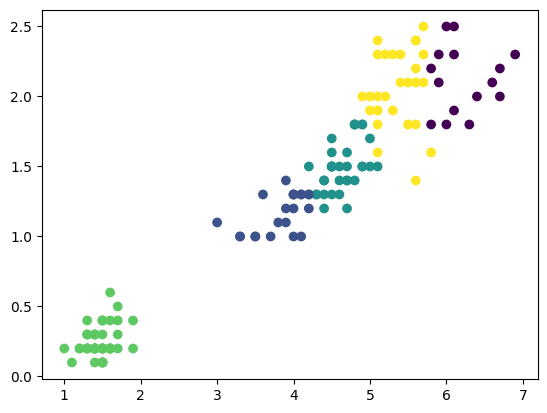

In [102]:
for i in range(2, 6):
    fcm2 = FuzzyCMeans(Dataset2, i)
    ax = plt.scatter(Dataset2["PetalLengthCm"], Dataset2["PetalWidthCm"], c=fcm2.data["label"])
    plt.show()

In [17]:
fcm2.data.head()

,PetalLengthCm,PetalWidthCm,gamma1,gamma2,gamma3,gamma4,gamma5,dist1,dist2,dist3,dist4,dist5,label
114,5.1,2.4,0.007276,0.100922,0.120266,0.728498,0.043038,17.880110,1.289011,1.081681,0.178572,3.022641,3
119,5.0,1.5,0.006733,0.052147,0.635768,0.237223,0.068129,14.090189,1.819261,0.149219,0.399914,1.392476,2
69,3.9,1.1,0.001030,0.001087,0.010494,0.002354,0.985035,6.673261,6.321596,0.654789,2.919154,0.006976,4
110,5.1,2.0,0.002741,0.036581,0.088382,0.852000,0.020296,16.314544,1.222502,0.505990,0.052489,2.203428,3
5,1.7,0.4,0.968786,0.003375,0.008103,0.004942,0.014795,0.080797,23.192895,9.659853,15.839156,5.290779,0
